> 和KNN一样, 要做数据标准化处理！

涉及距离

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [4]:
X = X[y<2,:2]
y = y[y<2]

在这里暂时先只使用二维的，所以是2

取前两个特征的目的是可视化

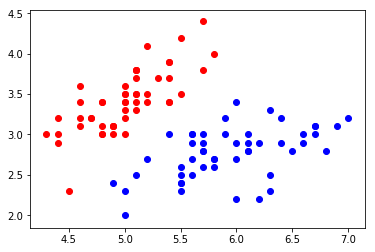

In [5]:
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='b')

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
standarScaler = StandardScaler()
standarScaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
X_standard = standarScaler.transform(X)

In [9]:
from sklearn.svm import LinearSVC

SVC的原因是因为这个线性的支撑向量机原理进行的

In [10]:
svc = LinearSVC(C=1e9)

In [11]:
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [12]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1,-1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(1,-1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_camp = ListedColormap(['#EF9A9A','#FFF69D','#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, camp=custom_camp)

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth', 'camp'
  s)


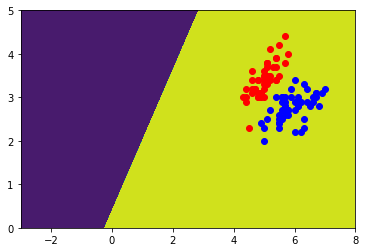

In [13]:
plot_decision_boundary(svc, axis=[-3,8,0,5])
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='b')

In [14]:
svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard, y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth', 'camp'
  s)


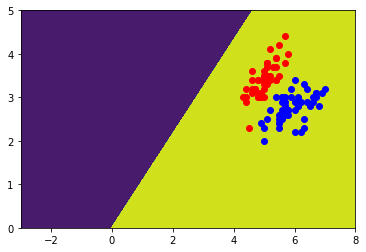

In [15]:
plot_decision_boundary(svc2, axis=[-3,8,0,5])
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='b')

In [16]:
svc.coef_

array([[ 4.03240555, -2.49295846]])

In [17]:
svc.intercept_

array([0.95365173])

一个直线对应一个截距

In [18]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1,-1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(1,-1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_camp = ListedColormap(['#EF9A9A','#FFF69D','#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, camp=custom_camp)
    
    # 绘制margin上线的曲线
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # w0 * x0 + w1 + b = 0
    # => x1  -w0/w1 * x0 -b/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y  = -w[0]/w[1] * plot_x -b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x -b/w[1] - 1/w[1]
    
    # 对坐标进行过滤
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    
    
    # 可以使用折线图的的方式表现出来
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], up_y[down_index], color='black')

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth', 'camp'
  s)


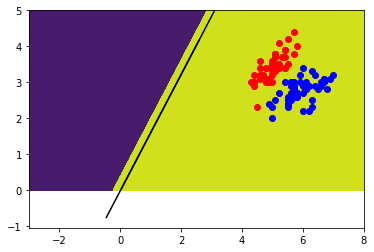

In [19]:
plot_decision_boundary(svc, axis=[-3,8,0,5])
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='b')

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth', 'camp'
  s)


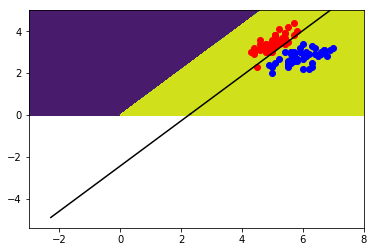

In [20]:
plot_decision_boundary(svc2, axis=[-3,8,0,5])
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='b')